# Results analisys

This Notebook has the intention to compares the metrics of a DRL Policy and a RB Policy applied both to a Building Control in EnergyPlus model.

## Importing the evaluation result files

First you need to import the files produced by `init_conventional.py` `init_evaluation.py`. The first is the RB Policy applied to the evaluation case, while the second one is the DRL Policy applied to the same scenario.

In [2]:
# Import the necesaty libraries
import pandas as pd

# Replace 'ppo_file_path' and 'rb_file_path' with the actual paths to your CSV files
drl_file_path = "C:/Users/grhen/Documents/Resultados_RLforEP/VN_P1_DQN/VN_P1_DQN.csv"
rb_file_path = "C:/Users/grhen/Documents/Resultados_RLforEP/VN_P1_RB/VN_P1_RB.csv"

# Read CSV files into pandas DataFrames
drl_data = pd.read_csv(drl_file_path, header=None)
rb_data = pd.read_csv(rb_file_path, header=None)

# Function to clean and format the data
def clean_and_format(data: pd.DataFrame):
    # Remove empty rows
    data = data.dropna(how='all')

    # Add the specified header
    header = ["To", "Ti", "v", "d", "RHo", "RHi", "dh", "dc", "opening_window_1", "opening_window_2",
              'hora', 'simulation_day', 'volumen', 'window_area_relation_north',
              'window_area_relation_west', 'window_area_relation_south', 'window_area_relation_east',
              'construction_config', 'internal_mass', 'latitud', 'longitud', 'altitud', 'beta', 'E_max',
              "rad", "reward", "terminated", "truncated", 'energy']

    data.columns = header

    return data

# Apply cleaning and formatting to both DataFrames
drl_data_cleaned = clean_and_format(drl_data)
rb_data_cleaned = clean_and_format(rb_data)

# Now 'ppo_data_cleaned' and 'rb_data_cleaned' contain the cleaned and formatted data


You can analyse the general results obtained in both files with the `describe` method of pandas for DataFrame types.

In [3]:
# General results of the RB Policy
rb_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,construction_config,internal_mass,latitud,longitud,altitud,beta,E_max,rad,reward,energy
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8.759000e+03,8759.000000,8759.000000,8759.000000,...,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,15.700365,27.207280,4.277813,201.389542,54.463828,29.660978,1.351151e+07,99.559227,0.131864,0.131864,...,196.700265,3.704284,3.635727,0.013358,12.565642,64.886806,202.176510,3.655824,-18.826664,18.826664
std,7.843632,5.262846,2.309813,96.639529,18.648707,15.385139,1.449278e+07,6664.232324,0.338363,0.338363,...,99.428938,2.244748,10.446509,0.242089,6.412858,15.199097,100.465765,2.227052,20.176486,20.176486
min,-4.316667,18.873147,0.100000,0.000000,16.000000,4.218399,0.000000e+00,0.000000,0.000000,0.000000,...,-61.195808,-1.777911,-34.658558,-0.750104,-3.695937,11.230262,-51.348410,-1.217822,-98.992289,0.000000
25%,9.975000,22.499394,2.533333,153.000000,39.166667,17.281971,3.630078e+05,0.000000,0.000000,0.000000,...,139.970129,1.991727,-3.225795,-0.128522,7.555533,54.024594,149.034840,1.909880,-31.136714,0.442699
50%,15.800000,25.179676,3.966667,212.000000,54.000000,27.341207,8.918507e+06,0.000000,0.000000,0.000000,...,208.904002,3.335550,3.697818,0.007226,12.757257,64.396203,212.446215,3.287448,-12.476576,12.476576
75%,21.308333,32.477152,5.700000,262.166667,68.666667,39.185569,2.231038e+07,0.000000,0.000000,0.000000,...,262.995370,5.084859,10.761022,0.146227,17.945330,75.549782,272.014777,5.198956,-0.442699,31.136714
max,37.650000,37.319667,14.500000,359.833333,100.000000,96.481720,7.670426e+07,502430.487483,1.000000,1.000000,...,408.528903,11.196872,42.743512,3.000642,28.455440,118.430371,432.751535,11.521621,-0.000000,98.992289


In [4]:
# General results of the DRL Policy
drl_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,construction_config,internal_mass,latitud,longitud,altitud,beta,E_max,rad,reward,energy
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8.759000e+03,8.759000e+03,8759.000000,8759.000000,...,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,15.700365,26.591401,4.277813,201.389542,54.463828,70.588170,1.253650e+06,1.309786e+03,0.192031,0.192031,...,195.788107,3.703955,3.573924,0.009338,12.569178,64.899171,202.318372,3.660332,-1.664754,1.664754
std,7.843632,4.632647,2.309813,96.639529,18.648707,22.329097,1.818179e+06,1.132307e+05,0.393920,0.393920,...,99.521324,2.237579,10.454470,0.237524,6.420855,15.209276,100.255505,2.224399,2.330772,2.330772
min,-4.316667,20.240145,0.100000,0.000000,16.000000,9.452294,0.000000e+00,0.000000e+00,0.000000,0.000000,...,-56.209612,-1.092071,-37.429034,-0.720622,-3.968798,16.810632,-55.128522,-1.009469,-74.999741,0.000000
25%,9.975000,21.976633,2.533333,153.000000,39.166667,51.551664,0.000000e+00,0.000000e+00,0.000000,0.000000,...,137.238385,1.997293,-3.422285,-0.135922,7.541607,54.309130,149.662983,1.941267,-3.058142,0.000000
50%,15.800000,25.834074,3.966667,212.000000,54.000000,70.961445,5.233924e+05,0.000000e+00,0.000000,0.000000,...,207.813619,3.359166,3.530653,-0.001001,12.741199,64.483933,212.684661,3.298974,-0.754183,0.754183
75%,21.308333,31.125058,5.700000,262.166667,68.666667,92.432157,2.257722e+06,0.000000e+00,0.000000,0.000000,...,260.369822,5.110445,10.566016,0.138893,17.990150,75.583766,271.189193,5.195421,-0.000000,3.058142
max,37.650000,36.381151,14.500000,359.833333,100.000000,100.000000,6.393378e+07,1.059036e+07,1.000000,1.000000,...,407.997099,11.103634,38.735367,2.797552,29.042490,114.534655,413.249767,11.679796,-0.000000,74.999741


## Graphs

Some metrics are better whe we can see how they change in time. In this part graphs are created to a more detailed view of the results.

In [5]:
import matplotlib.pyplot as plt

def line_plot(
    drl_data_cleaned: pd.DataFrame,
    rb_data_cleaned: pd.DataFrame,
    column_name:str
    ):
    """Plot a line chart

    Args:
        ppo_data_cleaned (pd.DataFrame): The metrics of the DRL Policy to be ploted.
        rb_data_cleaned (pd.DataFrame): The metrics of the RB Policy to be ploted.
        column_name (str): The ID name of the column in the DataFrames evaluated.
    """
    # Plotting PPO results
    plt.plot(drl_data_cleaned[column_name], label='DRL')

    # Plotting RB results
    plt.plot(rb_data_cleaned[column_name], label='RB')

    # Adding labels and title
    plt.xlabel('Time Steps')
    plt.ylabel(column_name)
    plt.title(f'Comparison of {column_name} between DRL and RB policies')
    plt.legend()

    # Display the plot
    plt.show()


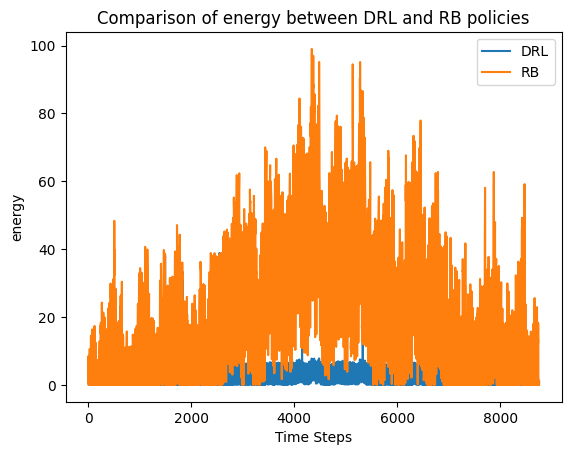

In [6]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'energy'

line_plot(
    drl_data_cleaned=drl_data_cleaned,
    rb_data_cleaned=rb_data_cleaned,
    column_name=column_name
    )

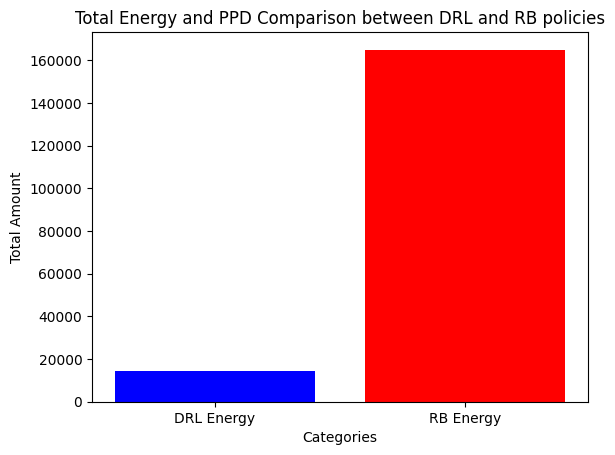

In [7]:
# Define the columns representing 'energy' and 'comfort'
energy_column = 'energy'

# Calculate total energy and comfort for each DataFrame
drl_total_energy = drl_data_cleaned[energy_column].sum()

rb_total_energy = rb_data_cleaned[energy_column].sum()

# Create a bar graph
categories = ['DRL Energy', 'RB Energy']
values = [drl_total_energy, rb_total_energy]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [ ]:
# Define the columns representing 'energy' and 'comfort'
ppd_column = 'ppd'

# Calculate total energy and comfort for each DataFrame
drl_total_ppd = drl_data_cleaned[ppd_column].mean()/100

rb_total_ppd = rb_data_cleaned[ppd_column].mean()/100

# Create a bar graph
categories = ['DRL PPD', 'RB PPD']
values = [drl_total_ppd, rb_total_ppd]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [9]:
drl_energy_rate_increment = (drl_total_energy-rb_total_energy)/rb_total_energy
#drl_comfort_rate_increment = (drl_total_ppd-rb_total_ppd)/rb_total_ppd

print('The Energy Rate Increment of DRL Policy is: ' + str(round(drl_energy_rate_increment*100, 2))+'%\n')
#print('The PPD Rate Increment of DRL Policy is: ' + str(round(drl_comfort_rate_increment*100, 2))+'%')

The Energy Rate Increment of DRL Policy is: -91.16%



## Análisis de políticas

En este apartado analizaremos las políticas seguidas por el agente DRL y las compararemos con las del RB.
Para ello, caracterizaremos algunas métricas generales que contemplen el año entero y luego nos enfocaremos en el estudio de algunas semanas características para observar el comportamiento de cada política.

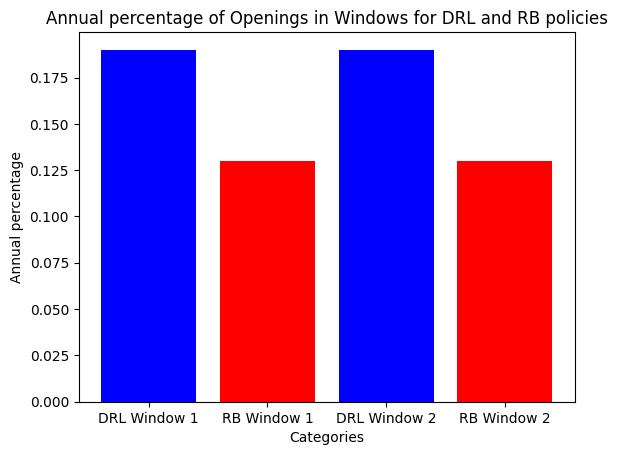

In [10]:
# Define the columns representing 'energy' and 'comfort'
metrics = [
    round(drl_data_cleaned.describe()['opening_window_1']['mean'],2),
    round(drl_data_cleaned.describe()['opening_window_2']['mean'],2),
    round(rb_data_cleaned.describe()['opening_window_1']['mean'],2),
    round(rb_data_cleaned.describe()['opening_window_2']['mean'],2)
]

# Create a bar graph
categories = ['DRL Window 1', 'RB Window 1', 'DRL Window 2', 'RB Window 2']
values = [metrics[0], metrics[2], metrics[1], metrics[3]]

plt.bar(categories, values, color=['blue', 'red', 'blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Annual percentage')
plt.title('Annual percentage of Openings in Windows for DRL and RB policies')
plt.show()

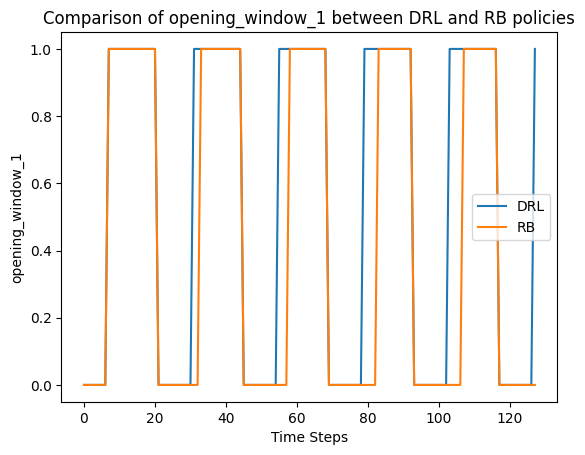

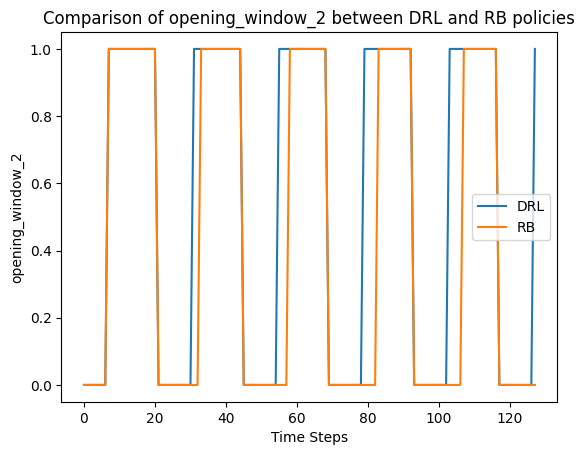

In [17]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[:128],
    rb_data_cleaned=rb_data_cleaned.iloc[:128],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[:128],
    rb_data_cleaned=rb_data_cleaned.iloc[:128],
    column_name=column_name
    )

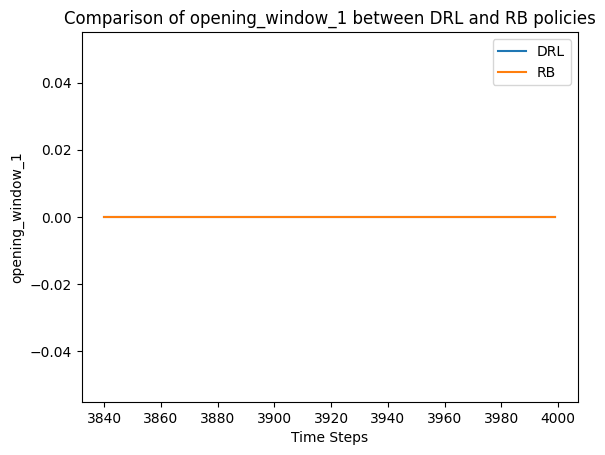

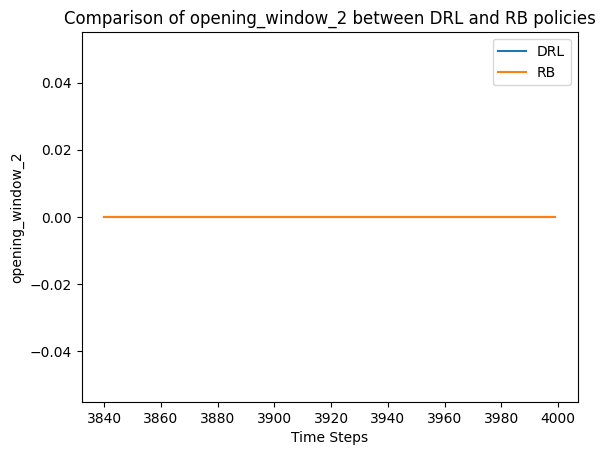

In [18]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[3840:4000],
    rb_data_cleaned=rb_data_cleaned.iloc[3840:4000],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[3840:4000],
    rb_data_cleaned=rb_data_cleaned.iloc[3840:4000],
    column_name=column_name
    )